# 回溯算法总结篇
* https://programmercarl.com/%E5%9B%9E%E6%BA%AF%E6%80%BB%E7%BB%93.html

回溯是递归的副产品，只要有递归就会有回溯，所以回溯法也经常和二叉树遍历，深度优先搜索混在一起，因为这两种方式都是用了递归。

回溯法就是暴力搜索，并不是什么高效的算法，最多再剪枝一下。

回溯算法能解决如下问题：

* 组合问题：N个数里面按一定规则找出k个数的集合
* 排列问题：N个数按一定规则全排列，有几种排列方式
* 切割问题：一个字符串按一定规则有几种切割方式
* 子集问题：一个N个数的集合里有多少符合条件的子集
* 棋盘问题：N皇后，解数独等等

* 子集问题分析：
    * 时间复杂度：O(2^n)，因为每一个元素的状态无外乎取与不取，所以时间复杂度为O(2^n)
    * 空间复杂度：O(n)，递归深度为n，所以系统栈所用空间为O(n)，每一层递归所用的空间都是常数级别，注意代码里的result和path都是全局变量，就算是放在参数里，传的也是引用，并不会新申请内存空间，最终空间复杂度为O(n)
* 排列问题分析：
    * 时间复杂度：O(n!)，这个可以从排列的树形图中很明显发现，每一层节点为n，第二层每一个分支都延伸了n-1个分支，再往下又是n-2个分支，所以一直到叶子节点一共就是 n * n-1 * n-2 * ..... 1 = n!。
    * 空间复杂度：O(n)，和子集问题同理。
* 组合问题分析：
    * 时间复杂度：O(2^n)，组合问题其实就是一种子集的问题，所以组合问题最坏的情况，也不会超过子集问题的时间复杂度。
    * 空间复杂度：O(n)，和子集问题同理。
* N皇后问题分析：
    * 时间复杂度：O(n!) ，其实如果看树形图的话，直觉上是O(n^n)，但皇后之间不能见面所以在搜索的过程中是有剪枝的，最差也就是O（n!），n!表示n * (n-1) * .... * 1。
    * 空间复杂度：O(n)，和子集问题同理。
* 解数独问题分析：
    * 时间复杂度：O(9^m) , m是'.'的数目。
    * 空间复杂度：O(n^2)，递归的深度是n^2
    
一般说道回溯算法的复杂度，都说是指数级别的时间复杂度，这也算是一个概括吧！

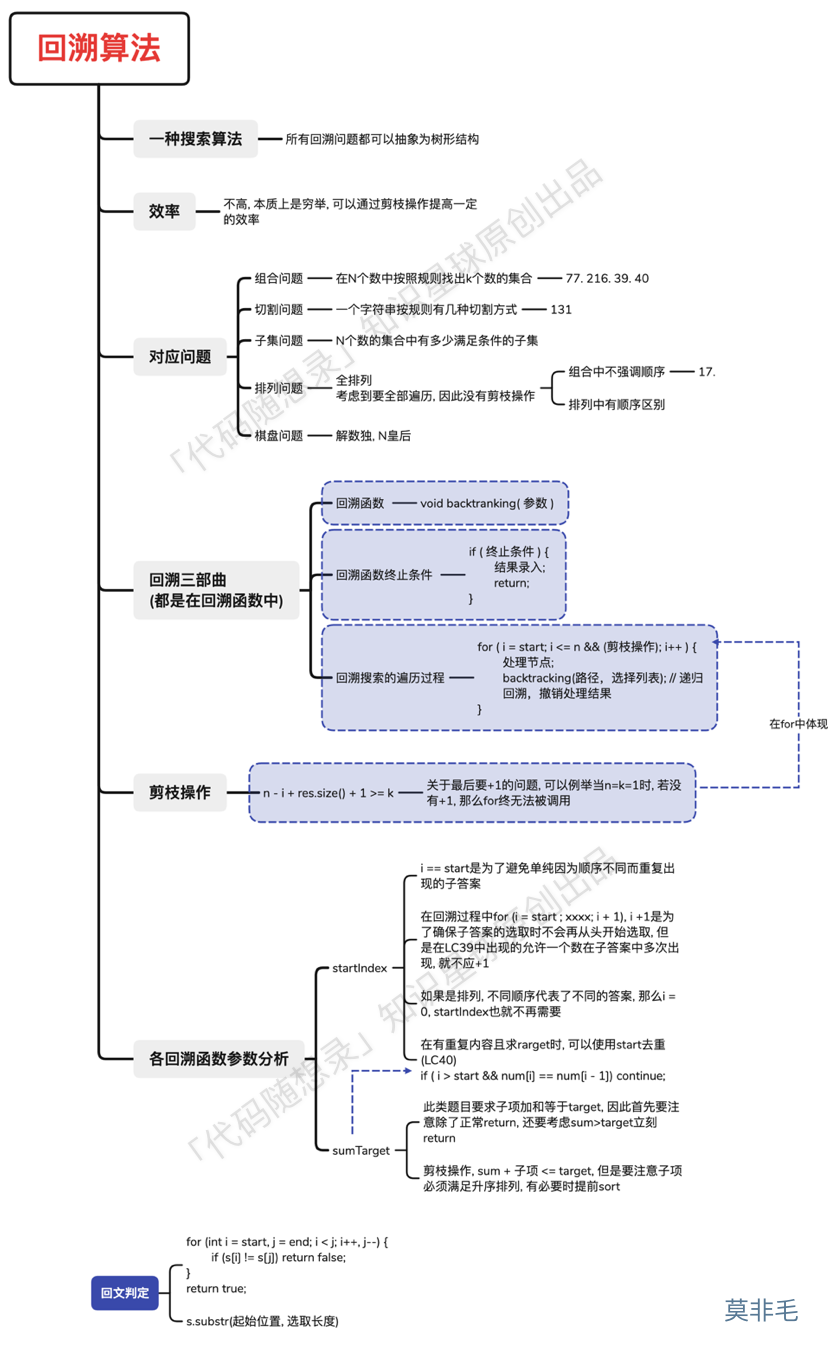

# 332. Reconstruct Itinerary (hard)
* https://leetcode.com/problems/reconstruct-itinerary/description/
* https://programmercarl.com/0332.%E9%87%8D%E6%96%B0%E5%AE%89%E6%8E%92%E8%A1%8C%E7%A8%8B.html

In [ ]:
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        from collections import defaultdict
        self.res = []
        self.targets = defaultdict(list)
        for u, v in tickets:
            self.targets[u].append(v)
        for airport in self.targets:
            self.targets[airport].sort(reverse=True)
        self.res = []
        self.backtrack("JFK")
        return self.res[::-1]

    def backtrack(self, airport):
        while self.targets[airport]:   # 当机场还有可到达的机场时
            next_airport = self.targets[airport].pop() # 弹出下一个机场
            self.backtrack(next_airport)  # 递归调用回溯函数进行深度优先搜索
        self.res.append(airport)

In [ ]:
class Solution:
    def findItinerary(self, tickets: List[List[str]]) -> List[str]:
        self.adj = {}

        # sort by the destination alphabetically
        tickets.sort(key=lambda x:x[1])

        # get all possible connection for each destination
        for u, v in tickets:
            if u in self.adj: 
                self.adj[u].append(v)
            else: 
                self.adj[u] = [v]

        # 从JFK出发
        self.result = []
        self.dfs("JFK")  # start with JFK

        return self.result[::-1]  # reverse to get the result

    def dfs(self, s):
        # if depart city has flight and the flight can go to another city
        while s in self.adj and len(self.adj[s]) > 0:
            v = self.adj[s][0]  # we go to the 1 choice of the city
            self.adj[s].pop(0)  # get rid of this choice since we used it
            self.dfs(v)  # we start from the new airport
        self.result.append(s)  # after append, it will back track to last node, thus the result list is in reversed order

# 51. N-Queens
* https://leetcode.com/problems/n-queens/description/
* https://programmercarl.com/0051.N%E7%9A%87%E5%90%8E.html
1. 不能同行
2. 不能同列
3. 不能同斜线


In [ ]:
# 时间复杂度: O(n!)
# 空间复杂度: O(n)
class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        self.res = []
        chessboard = ['.' * n for _ in range(n)] #初始化棋盘
        self.backtrack(n, 0, chessboard)
        return [[''.join(row) for row in solution] for solution in self.res]
        
    def backtrack(self, n, row, chessboard):
        if row == n:
            self.res.append(chessboard[:])
            return
        for col in range(n):
            if self.isvalid(row, col, chessboard):
                chessboard[row] = chessboard[row][:col] + 'Q' + chessboard[row][col+1:] # 放置皇后
                self.backtrack(n, row+1, chessboard) # 递归到下一行
                chessboard[row] = chessboard[row][:col] + '.' + chessboard[row][col+1:] # 回溯，撤销皇后

    def isvalid(self, row, col, chessboard):
        # 检查此位置是否能放置皇后
        for i in range(row):
            if chessboard[i][col] == 'Q': # 当前列已存在皇后
                return False
        
        i, j = row - 1, col - 1 # 检查45度
        while i >= 0 and j >= 0:
            if chessboard[i][j] == 'Q':
                return False  # 左上方向已经存在皇后，不合法
            i -= 1
            j -= 1

        i, j = row - 1, col + 1 # 检查135度
        while i >= 0 and j < len(chessboard):
            if chessboard[i][j] == 'Q':
                return False  # 右上方向已经存在皇后，不合法
            i -= 1
            j += 1

        return True  # 当前位置合法

# 37. Sudoku Solver
* https://leetcode.com/problems/sudoku-solver/description/
* https://programmercarl.com/0037.%E8%A7%A3%E6%95%B0%E7%8B%AC.html

我觉得很开心的是 原来数独可以程序解，我所知道的是 数独是NP problem，这个感觉把很多知识融汇了

In [ ]:
class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        self.backtrack(board)
    
    def backtrack(self, board):
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i][j] != '.':
                    continue
                for k in range(1, 10):
                    if self.isvalid(i, j, k, board):
                        board[i][j] = str(k)
                        if self.backtrack(board):
                            return True
                        board[i][j] = '.'
                return False # 如果1-9都无法valid
        return True # 全部填完
    
    def isvalid(self, row, col, val, board):
        for i in range(9):
            if board[row][i] == str(val):
                return False
        for j in range(9):
            if board[j][col] == str(val):
                return False
        start_row = (row // 3) * 3
        start_col = (col // 3) * 3
        for i in range(start_row, start_row + 3):
            for j in range(start_col, start_col + 3):
                if board[i][j] == str(val):
                    return False
        return True